### Program uses an artifical reccurent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of corporation (APPLE) using the past 60 day stock price 

### A recurrent neural network (RNN) is a deep learning model that is trained to process and convert a sequential data input into a specific sequential data output. Sequential data is data—such as words, sentences, or time-series data—where sequential components interrelate based on complex semantics and syntax rules.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [5]:
#Getting the stock 
df = yf.download('AAPL',start='2012-01-01',end='2023-12-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416982,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [6]:
#Get the number of rows and columns
df.shape #3018 rows and 6 columns

(3018, 6)

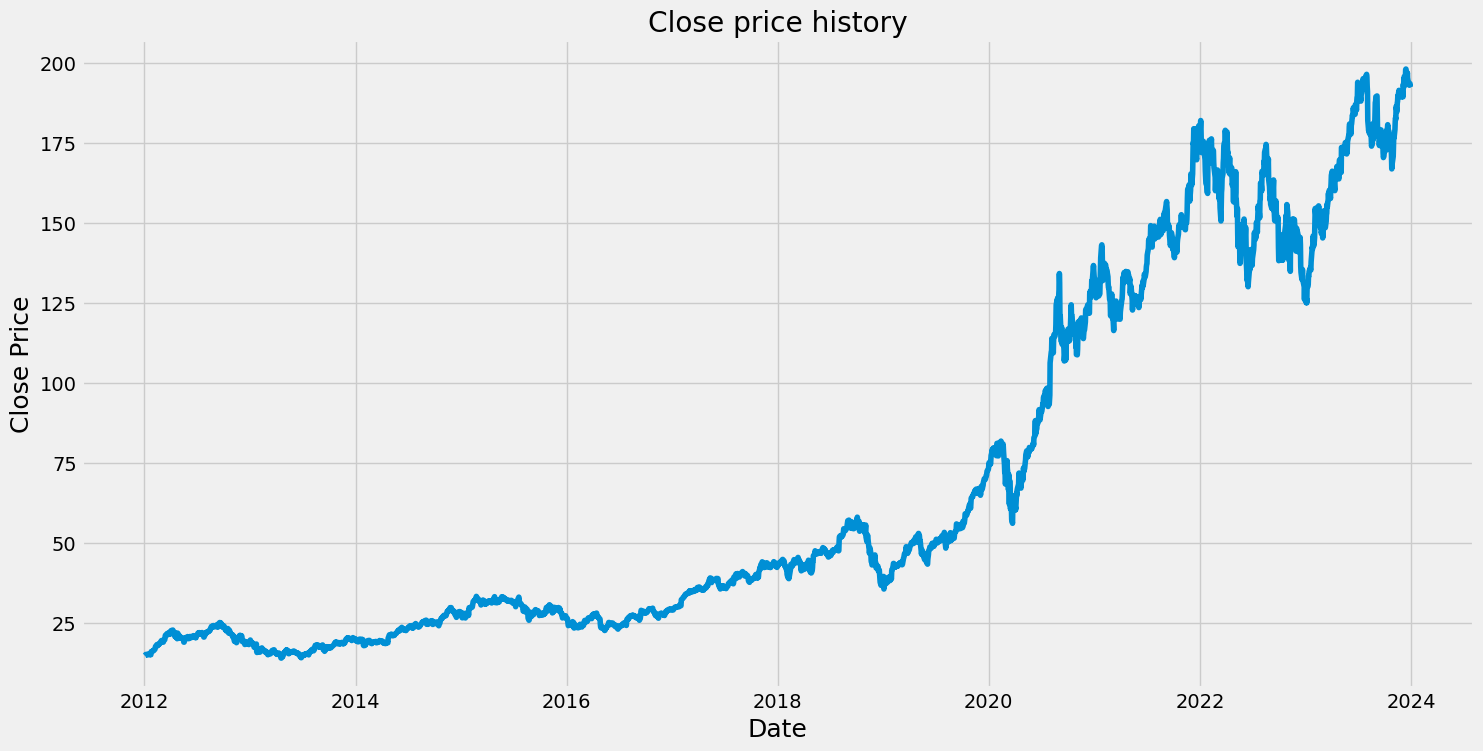

In [7]:
#Visualize the closing price history 

plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [8]:
#create a new dataframe with only close

data = df.filter(['Close'])
#Convert datafram to a numpy array
dataset = data.values 
#get the number of rows to train model

training_data_len = math.ceil(len(dataset)*0.8) #math.ceil rounds and we are also multilpying by the number of our training we want


training_data_len

2415

In [9]:
#scale the data (good practice and usually helps model)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.97306723],
       [0.97540217],
       [0.96970066]])

In [10]:
#Create the training data set
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train
x_train = []#independent variables or features
y_train = []#dependent variables or features

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])#contain 60 values and indexed from postion 0 to 59
    y_train.append(train_data[i, 0])#contain 61st value at postion 60
    if i<=60:
        print(x_train)
        print(y_train)
        print()

#the big array is the x train
# the [0.425] is the y train

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]



In [11]:
#Convert the x_train and y_train dataset to numpy arrays to train LSTM
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
#reshape the data because LSTM takes 3d andright now we have only two
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2355, 60, 1)

In [13]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#Compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
#train the model
#An epoch means training the neural network with all the training data for one cycle. 
#In an epoch, we use all of the data exactly once.

model.fit(x_train,y_train,batch_size=1, epochs=1)

2355/2355 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0014


In [21]:
#Create the testing data set
#Create a new array containing scaled values from index 2355 to 2003 end of dataset

test_data = scaled_data[training_data_len - 60: ,:]
#Create x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]#all values we want model to predict

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])#contain 60 values and indexed from postion 0 to 59

In [23]:
#Convert the data to a numpy array
x_test = np.array(x_test)# converting so we can use in LSTM

In [24]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#x_test.shape[0] number of rows which is number of samples we have
#x_test.shape[1] number of columns which is equal to number of time steps
#,1 is the number of features which is one just close price

In [25]:
#we want models predicted price values for x_test
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#unscaling values to have predictions we created have same values as y_test

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


###  The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values.

In [27]:
#get the root mean squared error (RSME)
rsme = np.sqrt(np.mean(predictions-y_test)**2)
rsme#very good you want this number to be low

5.611392437126704

/var/folders/zb/vpw92n0d5bv845zdvgct5lnm0000gn/T/ipykernel_2128/3130654034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


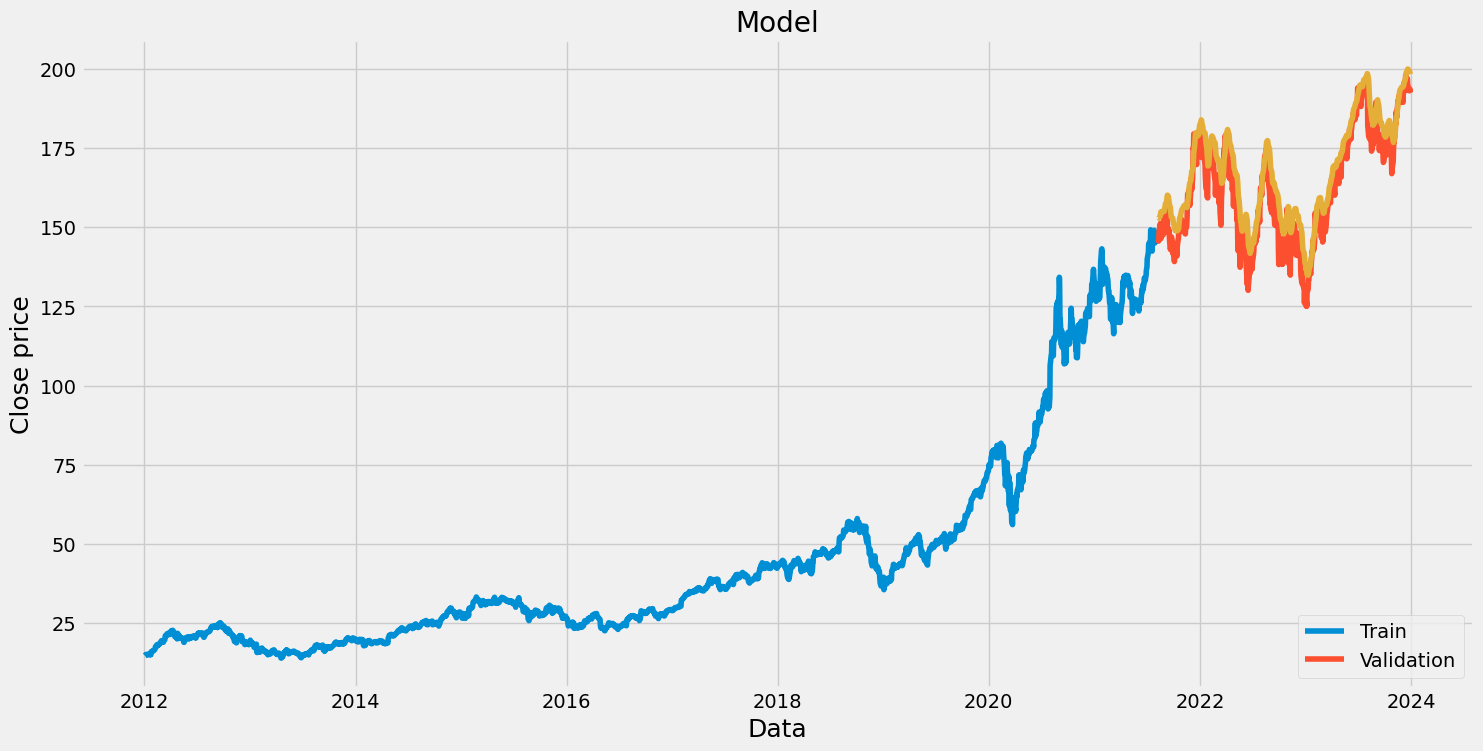

In [32]:
#plot the data 

train = data[:training_data_len]

validation = data[training_data_len:]
validation['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close price',fontsize=18)

plt.plot(train['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

In [33]:
#Show the validation actual price and predicted prices
validation

,Close,Predictions
Date,,
2021-08-09,146.089996,153.083572
2021-08-10,145.600006,153.046677
2021-08-11,145.860001,152.930984
2021-08-12,148.889999,152.825989
2021-08-13,149.100006,153.096436
...,...,...
2023-12-22,193.600006,199.711517
2023-12-26,193.050003,199.377930
2023-12-27,193.149994,198.956451


In [54]:
#Get the quote 
apple_quote = yf.download('AAPL',start = '2012-01-01',end='2024-01-01')
#create a new datafram
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the datafram to an array 
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to np.array 
X_test = np.array(X_test)
#reshape the data to be 3d
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get predicted scaled price 
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
#197.94 will be our predicted price 

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[197.94855]]
